In [8]:
from datetime import date
from pathlib import Path

import aiohttp
import aiomoex
import pandas as pd
from aiomoex import client
from aiomoex.request_helpers import make_url, get_table, make_query
import datatable as dt
from datatable import f

from glob import glob
import seaborn as sns

from parsing.stocks import get_stocks_history, __STOCKS_FOLDER__, __SELECTED_STOCKS__

In [ ]:
__BLUE_CHIPS__ = ("SBER",
                  "LKOH",
                  "GMKN",
                  "GAZP",
                  "NVTK",
                  "YNDX",
                  "ROSN",
                  "TCSG",
                  "POLY",
                  "MGNT",
                  "PLZL",
                  "NLMK",
                  "SNGS",
                  "TATN",
                  "ALRS",)

In [2]:
for security in __BLUE_CHIPS__:
    url = make_url(engine="stock", market="shares", board="TQBR", security=security, history=True)
    query = make_query(start='2016-01-01', end='2022-01-01')

    async with aiohttp.ClientSession() as session:
        iss = client.ISSClient(session, url, query)

        data = await iss.get_all()
        history = get_table(data, "history")
        if len(history) == 0:
            continue

        bond_df = pd.DataFrame(history)
        bond_df.to_csv(str(__STOCKS_FOLDER__.joinpath('history', security + '.csv')), header=True, index=False)


In [6]:
DT = get_stocks_history()

In [7]:
DT.to_pandas()

,BOARDID,TRADEDATE,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,...,CLOSE,VOLUME,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL,TRADINGSESSION
0,TQBR,2016-01-04,Сбербанк,SBER,50340,5.077424e+09,101.00,97.94,101.78,98.01,...,98.01,51264550,99.04,99.04,98.01,5.077424e+09,5.077424e+09,5.077424e+09,NaN,3
1,TQBR,2016-01-05,Сбербанк,SBER,43389,4.821703e+09,97.88,97.16,99.24,98.89,...,98.89,49071570,98.26,98.26,98.89,4.821703e+09,4.821703e+09,4.821703e+09,NaN,3
2,TQBR,2016-01-06,Сбербанк,SBER,38413,3.986266e+09,98.70,96.83,99.56,96.85,...,96.85,40710930,97.92,97.92,96.85,3.986266e+09,3.986266e+09,3.986266e+09,NaN,3
3,TQBR,2016-01-11,Сбербанк,SBER,84949,7.987444e+09,93.61,91.01,94.89,91.03,...,91.03,86120290,92.75,92.75,91.03,7.987444e+09,7.987444e+09,7.987444e+09,NaN,3
4,TQBR,2016-01-12,Сбербанк,SBER,100086,1.004371e+10,89.09,88.52,92.88,91.71,...,91.71,110109050,91.22,91.22,91.71,1.004371e+10,1.004371e+10,1.004371e+10,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21755,TQBR,2021-12-24,АЛРОСА ао,ALRS,21366,1.194114e+09,113.95,113.07,115.45,115.37,...,115.30,10449280,114.22,114.22,115.37,1.046094e+09,1.046094e+09,1.046094e+09,0.0,3
21756,TQBR,2021-12-27,АЛРОСА ао,ALRS,29997,1.374304e+09,115.50,114.99,116.89,116.36,...,116.55,11845050,116.03,116.03,116.36,1.166751e+09,1.166751e+09,1.166751e+09,0.0,3
21757,TQBR,2021-12-28,АЛРОСА ао,ALRS,42945,2.177207e+09,116.86,116.20,120.53,119.91,...,119.98,18288300,119.12,119.12,119.91,1.836336e+09,1.836336e+09,1.836336e+09,0.0,3
21758,TQBR,2021-12-29,АЛРОСА ао,ALRS,35144,2.113906e+09,119.20,118.60,121.36,120.22,...,121.25,17622680,119.89,119.89,120.22,1.661793e+09,1.661793e+09,1.661793e+09,0.0,3


<AxesSubplot:xlabel='TRADEDATE', ylabel='CLOSE'>

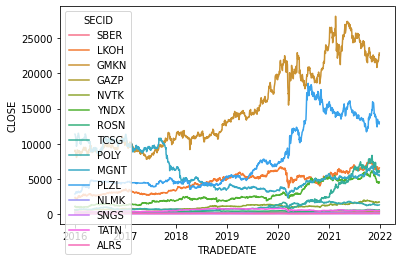

In [9]:
sns.lineplot(data=DT[:, ['TRADEDATE', 'CLOSE', 'SECID']].to_pandas(), x='TRADEDATE', y='CLOSE', hue='SECID')

In [10]:
DT[:, dt.update(count = dt.count()), dt.by('SECID')]

In [11]:
grouped = DT[0, :, dt.by('SECID')]

selected = grouped[:10, :, dt.sort(-dt.f.count)]

In [14]:
selected[:, 'SECID'].to_list()[0]

['ALRS',
 'GAZP',
 'GMKN',
 'LKOH',
 'MGNT',
 'NLMK',
 'NVTK',
 'PLZL',
 'POLY',
 'ROSN']